# Predicting CO2 emissions of passenger cars registered in the EU

In this notebook, we investigate a public dataset related to the
[Monitoring of CO2 emissions from passenger cars Regulation (EU) 2019/631](https://www.eea.europa.eu/en/datahub/datahubitem-view/fa8b1229-3db6-495d-b18e-9c9b3267c02b).

According to the European Environment Agency (EEA):
> The Regulation (EU) No 2019/631 requires Countries to record information for each new passenger car registered in its territory. Every year, each Member State shall submit to the Commission all the information related to their new registrations. In particular, the following details are required for each new passenger car registered: manufacturer name, type approval number, type, variant, version, make and commercial name, specific emissions of CO2 (NEDC and WLTP protocols), masses of the vehicle, wheel base, track width, engine capacity and power, fuel type and mode, eco-innovations and electricity consumption. Data for EU-27 and UK are reported in the main database.

Our goal is to design a machine learning model capable of predicting CO2 emissions based on vehicle specs.

The main steps of this notebook will be:
1. using basic notebook features
2. downloading a public dataset from the EEA website
3. using data analysis libraries to explore and visualize the dataset
4. preparing datasets to train and evaluate machine learning models
5. training multiple machine learning models
6. comparing different models with adequate metrics
7. exploring predictions of the model of your choice

## 1. Learning notebook basics

### How to run a notebook cell

Notebooks allow users to run:
- Python code by simply writing a valid Python expression
- shell commands like in a terminal by using an exclamation mark `!`.

To run the cells below:
1. select the cell with your mouse
2. press shift+enter or press the play button

In [91]:
# a Python cell
'a' * 3

'aaa'

Notice that the output of the command is written directly below the cell.

This will also be the case for figures and tables.

In [92]:
# a shell command, as indicated by the exclamation mark `!`
!echo 'aaa'

aaa


In [93]:
# a Python cell that fails
'a' + 3

TypeError: can only concatenate str (not "int") to str

Assertions can be used to make sure that a certain property you are interested in is true.

They will be used to guide you throughout this notebook.

In [89]:
# a passing assertion
assert 3 > 2

In [90]:
# a failing assertion
assert 10 > 1000

AssertionError: 

### Warning

Notebook cells can be run **in any order** and multiple times.

If you are not sure which cells have been run, it is possible to restart the Jupyter kernel which will clear all cells.

## 2. Downloading the dataset

The dataset we are working with has been published on the [EEA website](https://www.eea.europa.eu/en/datahub/datahubitem-view/fa8b1229-3db6-495d-b18e-9c9b3267c02b?activeAccordion=1086728%2C1084365%2C1084411).

### Running shell commands to obtain the raw data

1. Downloading a zipped file with the `wget` command
2. Unzipping the files with `unzip`
3. Getting a preview of a large CSV file with `ls`, `wc`, and `head`

In [5]:
!wget https://sdi.eea.europa.eu/datashare/s/xgTiQR2KAmAF9en/download

--2024-01-23 15:40:16--  https://sdi.eea.europa.eu/datashare/s/xgTiQR2KAmAF9en/download


Resolving sdi.eea.europa.eu (sdi.eea.europa.eu)... 87.54.7.149
Connecting to sdi.eea.europa.eu (sdi.eea.europa.eu)|87.54.7.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘download’

download                [     <=>            ] 208,08M  10,2MB/s    in 19s     

2024-01-23 15:40:35 (10,7 MB/s) - ‘download’ saved [218189274]



In [6]:
!unzip download

Archive:  download
   creating: eea_t_co2-emissions-cars-final-2015_p_2015_v01_r00/
 extracting: eea_t_co2-emissions-cars-final-2015_p_2015_v01_r00/770aa0a5-83ce-4663-93fa-78507f1990d6.xml  
 extracting: eea_t_co2-emissions-cars-final-2015_p_2015_v01_r00/CO2_passenger_cars_v12.csv  


 extracting: eea_t_co2-emissions-cars-final-2015_p_2015_v01_r00/CO2_passenger_cars_v12.mdb  


In [94]:
!ls -lah eea_t_co2-emissions-cars-final-2015_p_2015_v01_r00/CO2_passenger_cars_v12.csv  

-rw-r--r--  1 beaujeanpaul  staff    72M Nov  7  2022 eea_t_co2-emissions-cars-final-2015_p_2015_v01_r00/CO2_passenger_cars_v12.csv


In [95]:
!wc -l eea_t_co2-emissions-cars-final-2015_p_2015_v01_r00/CO2_passenger_cars_v12.csv 

  440646 eea_t_co2-emissions-cars-final-2015_p_2015_v01_r00/CO2_passenger_cars_v12.csv


In [4]:
!head eea_t_co2-emissions-cars-final-2015_p_2015_v01_r00/CO2_passenger_cars_v12.csv  

id	MS	MP	Mh	Man	MMS	TAN	T	Va	Ve	Mk	Cn	Ct	r	e (g/km)	m (kg)	w (mm)	at1 (mm)	at2 (mm)	Ft	Fm	ec (cm3)	ep (KW)	z (Wh/km)	It	Er (g/km)
346261	LU	VW GROUP PC	VOLKSWAGEN	VOLKSWAGEN AG	VOLKSWAGEN AG	E1*2007/46*0623*09	AU	AC4CRBCX0	FD6FD6D9004N7MJOMLVR2	VOLKSWAGEN	GOLF	M1	3	119	1376	2620	1527	1496	DIESEL	M	1968	110			
346262	LU	VW GROUP PC	VOLKSWAGEN	VOLKSWAGEN AG	VOLKSWAGEN AG	E1*2007/46*0623*17	AU	GAC4CHHBX0	FD6FD6D9011S7MMON1ML71VR2	VOLKSWAGEN	GOLF	M1	3	145	1392	2626	1527	1496	PETROL	M	1984	162			
346263	LU	VW GROUP PC	VOLKSWAGEN	VOLKSWAGEN AG	VOLKSWAGEN AG	E1*2001/116*0356*17	2EC2	KN4D1350N	MEC24VD9	VOLKSWAGEN	CRAFTER	M1	1	209	2356	3665	1710	1716	DIESEL	M	1968	120			
346264	LU	VW GROUP PC	VOLKSWAGEN	VOLKSWAGEN AG	VOLKSWAGEN AG	E1*2007/46*0539*13	16	AECTHDX0	FD7FD7AM006N7MJVIVR0	VOLKSWAGEN	BEETLE	M1	1	148	1468	2538	1570	1548	PETROL	M	1390	118			
346265	LU	VW GROUP PC	VOLKSWAGEN	VOLKSWAGEN AG	VOLKSWAGEN AG	E1*2007/46*0539*14	16	ABCFFBX0	FD6FD62E018N7MJVIVR0	VOLKSWAGEN	BEETLE	M1	1	140	1411	252

You will only need to run the previous cells once.

**Note**: We recommend that you start running cells starting from section 3. in the case of a kernel restart.

## 3. Exploring and visualizing data

We turn to Python and its popular [pandas](https://pandas.pydata.org/) library to load the CO2_passenger_cars_v12.csv file.

Turning CSV files into so-called dataframes allows them to processed efficiently by multiple libraries for data analysis and machine learning.

In [1]:
import pandas as pd

cars: pd.DataFrame = (
    pd.read_csv(
        filepath_or_buffer='eea_t_co2-emissions-cars-final-2015_p_2015_v01_r00/CO2_passenger_cars_v12.csv',
        sep='\t',
        engine='pyarrow',
    )
    .rename(
        axis='columns',
        mapper={
            'id': 'vehicle_id',
            'MS': 'country',
            'MP': 'pool',
            'Mh': 'manufacturer_name_eu',
            'Man': 'manufacturer_name_self_reported',
            'MMS': 'manufacturer_name_registry',
            'TAN': 'type_approval_number',
            'T': 'type',
            'Va': 'variant',
            'Ve': 'version',
            'Mk': 'make',
            'Cn': 'commercial_name',
            'Ct': 'approved_vehicle_type_category',
            'r': 'total_new_registrations',
            'e (g/km)': 'co2_emissions_in_grams_per_km',
            'm (kg)': 'mass_running_order_in_kg',
            'w (mm)': 'wheel_base_in_mm',
            'at1 (mm)': 'steering_axle_width_in_mm',
            'at2 (mm)': 'other_axle_width_in_mm',
            'Ft': 'raw_fuel_type',
            'Fm': 'fuel_mode',
            'ec (cm3)': 'engine_capacity_in_cm3',
            'ep (KW)': 'engine_power_in_kilowatts',
            'z (Wh/km)': 'electric_energy_consumption_in_watthours_per_km',
            'It': 'innovative_technology',
            'Er (g/km)': 'co2_emissions_reduction_in_grams_per_km',
        },
    )
    .assign(
        fuel_type=lambda x: x.raw_fuel_type
            .str.lower()
            .str.replace('petrol phev', 'petrol-electric')
            .str.replace('hybrid/petrol/e', 'petrol-electric')
            .str.replace('/', '-')
    )
    .astype(
        {
            c: 'category' for c in
            ['country', 'fuel_type', 'fuel_mode', 'pool', 'manufacturer_name_eu']
        }
    )
    .dropna(axis='columns', how='all')
    .set_index('vehicle_id')
)

display(cars)

,country,pool,manufacturer_name_eu,manufacturer_name_self_reported,manufacturer_name_registry,type_approval_number,type,variant,version,make,...,steering_axle_width_in_mm,other_axle_width_in_mm,raw_fuel_type,fuel_mode,engine_capacity_in_cm3,engine_power_in_kilowatts,electric_energy_consumption_in_watthours_per_km,innovative_technology,co2_emissions_reduction_in_grams_per_km,fuel_type
vehicle_id,,,,,,,,,,,,,,,,,,,,,
346261,LU,VW GROUP PC,VOLKSWAGEN,VOLKSWAGEN AG,VOLKSWAGEN AG,E1*2007/46*0623*09,AU,AC4CRBCX0,FD6FD6D9004N7MJOMLVR2,VOLKSWAGEN,...,1527.0,1496.0,DIESEL,M,1968.0,110.0,NaN,None,NaN,diesel
346262,LU,VW GROUP PC,VOLKSWAGEN,VOLKSWAGEN AG,VOLKSWAGEN AG,E1*2007/46*0623*17,AU,GAC4CHHBX0,FD6FD6D9011S7MMON1ML71VR2,VOLKSWAGEN,...,1527.0,1496.0,PETROL,M,1984.0,162.0,NaN,None,NaN,petrol
346263,LU,VW GROUP PC,VOLKSWAGEN,VOLKSWAGEN AG,VOLKSWAGEN AG,E1*2001/116*0356*17,2EC2,KN4D1350N,MEC24VD9,VOLKSWAGEN,...,1710.0,1716.0,DIESEL,M,1968.0,120.0,NaN,None,NaN,diesel
346264,LU,VW GROUP PC,VOLKSWAGEN,VOLKSWAGEN AG,VOLKSWAGEN AG,E1*2007/46*0539*13,16,AECTHDX0,FD7FD7AM006N7MJVIVR0,VOLKSWAGEN,...,1570.0,1548.0,PETROL,M,1390.0,118.0,NaN,None,NaN,petrol
346265,LU,VW GROUP PC,VOLKSWAGEN,VOLKSWAGEN AG,VOLKSWAGEN AG,E1*2007/46*0539*14,16,ABCFFBX0,FD6FD62E018N7MJVIVR0,VOLKSWAGEN,...,1570.0,1546.0,DIESEL,M,1968.0,103.0,NaN,None,NaN,diesel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106455,DE,NaN,ASTON MARTIN,ASTON MARTIN LAGONDA LTD,ASTON MARTIN (GB),e11*KS07/46*0208*02,VHS(SF),SF12,L2RSDH,ASTON MARTIN,...,1570.0,1575.0,Petrol,M,5935.0,422.0,NaN,None,NaN,petrol
106456,DE,NaN,ASTON MARTIN,ASTON MARTIN LAGONDA LTD,ASTON MARTIN (GB),e11*KS07/46*0208*02,VH2(SF),SF12,L2RSDH,ASTON MARTIN,...,1570.0,1575.0,Petrol,M,5935.0,422.0,NaN,None,NaN,petrol
106457,DE,NaN,ASTON MARTIN,ASTON MARTIN LAGONDA LTD,ASTON MARTIN (GB),e11*KS07/46*0208*03,VH2(SF),SF12,L2RSDH,ASTON MARTIN,...,1570.0,1575.0,Petrol,M,5935.0,422.0,NaN,None,NaN,petrol


### Descriptive statistics

The resulting `cars` dataframe contains 440K rows and 26 columns, each row representing a specific vehicle model registered in the EU.

- to obtain the number of passenger cars sold in the EU in 2015 (approximately 13.7M), we must look at the `total_new_registrations` column

In [2]:
(
    cars
    .total_new_registrations
    .sum()
)

13781460

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440645 entries, 346261 to 240654
Data columns (total 26 columns):
 #   Column                                           Non-Null Count   Dtype   
---  ------                                           --------------   -----   
 0   country                                          440645 non-null  category
 1   pool                                             382812 non-null  category
 2   manufacturer_name_eu                             440645 non-null  category
 3   manufacturer_name_self_reported                  440645 non-null  object  
 4   manufacturer_name_registry                       416338 non-null  object  
 5   type_approval_number                             428046 non-null  object  
 6   type                                             437911 non-null  object  
 7   variant                                          434992 non-null  object  
 8   version                                          426616 non-null  object  
 9   make

In [45]:
(
    cars
    .isnull()
    .sum(axis='rows')
    .sort_values()
)

country                                                 0
manufacturer_name_self_reported                         0
total_new_registrations                                 0
manufacturer_name_eu                                    0
fuel_mode                                               1
approved_vehicle_type_category                          3
mass_running_order_in_kg                              214
raw_fuel_type                                         283
fuel_type                                             283
co2_emissions_in_grams_per_km                         797
commercial_name                                       860
engine_capacity_in_cm3                               2089
type                                                 2734
variant                                              5653
make                                                 6934
steering_axle_width_in_mm                            9931
wheel_base_in_mm                                    10823
type_approval_

In [4]:
cars.describe()

,total_new_registrations,co2_emissions_in_grams_per_km,mass_running_order_in_kg,wheel_base_in_mm,steering_axle_width_in_mm,other_axle_width_in_mm,engine_capacity_in_cm3,engine_power_in_kilowatts,electric_energy_consumption_in_watthours_per_km,co2_emissions_reduction_in_grams_per_km
count,440645.000000,439848.000000,440431.000000,429822.000000,430714.000000,414935.000000,438556.000000,365120.000000,3068.000000,2185.000000
mean,31.275653,133.033309,1533.404422,2710.747109,1550.775721,1549.121458,1845.725123,116.845758,156.363103,1.516568
std,198.756495,36.247475,316.868260,203.341887,59.551380,63.767014,677.916209,59.442062,40.641087,0.654276
min,1.000000,0.000000,430.000000,1120.000000,606.000000,456.000000,88.000000,10.000000,52.000000,1.000000
25%,1.000000,110.000000,1320.000000,2601.000000,1527.000000,1505.000000,1461.000000,81.000000,125.000000,1.200000
50%,2.000000,125.000000,1495.000000,2677.000000,1549.000000,1551.000000,1685.000000,103.000000,147.000000,1.200000
75%,10.000000,149.000000,1700.000000,2810.000000,1582.000000,1585.000000,1995.000000,135.000000,181.000000,1.400000
max,41936.000000,559.000000,6278.000000,5100.000000,2807.000000,5850.000000,8382.000000,999.000000,635.000000,4.000000


### Visualizing data

When working with a dataset, one of the main goals is to determine how the data is distributed.

Histograms provide great visual tools to apprehend facets of a large dataset like the one we are working with.

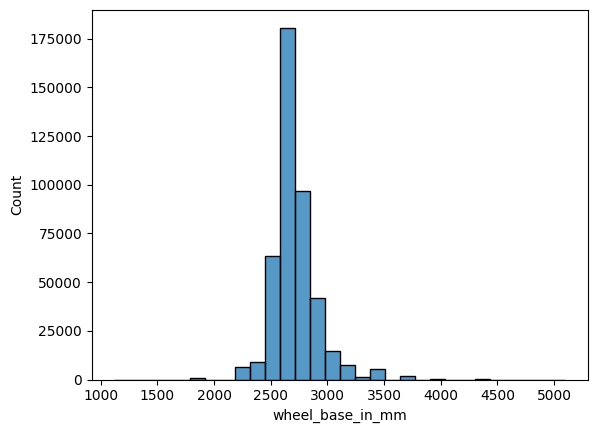

In [48]:
import seaborn as sns

sns.histplot(
    data=cars,
    x='wheel_base_in_mm',
    bins=30,
);

2-dimensional histograms can also be used to understand how often two numerical quantities occur at the same time.

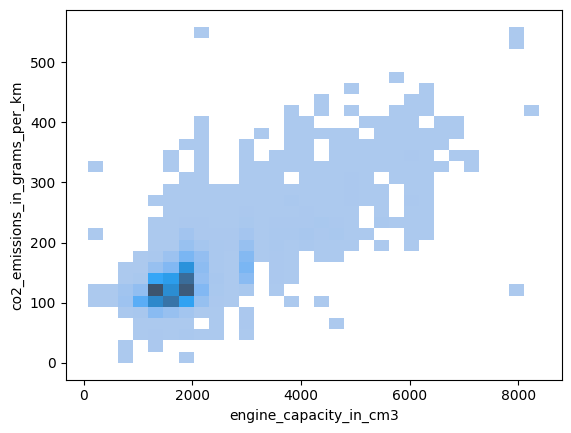

In [52]:
sns.histplot(
    data=cars,
    x='engine_capacity_in_cm3',
    y='co2_emissions_in_grams_per_km',
    bins=(30,30),
);

Histograms can also be stacked to take into account categories.

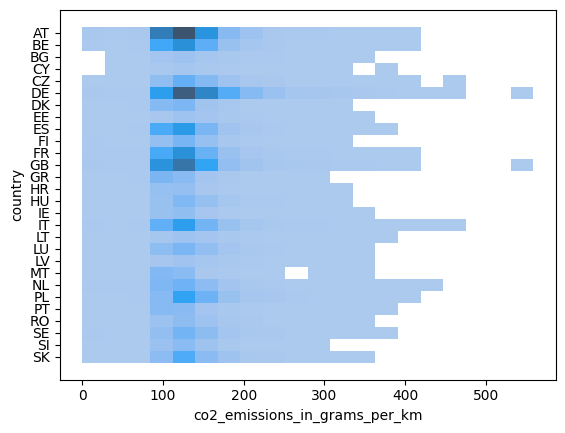

In [72]:
sns.histplot(
    data=cars,
    x='co2_emissions_in_grams_per_km',
    y='country',
    bins=20,
);

or use colors to represent the interplay between numerical and categorical data.

/Users/beaujeanpaul/Projects/intro-to-ai/.env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/beaujeanpaul/Projects/intro-to-ai/.env/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


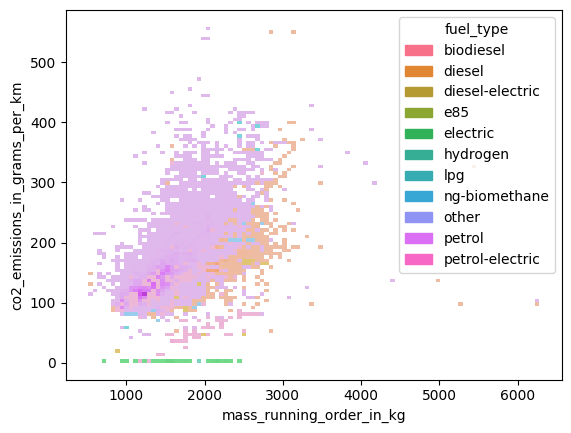

In [80]:
sns.histplot(
    data=cars,
    x='mass_running_order_in_kg',
    y='co2_emissions_in_grams_per_km',
    hue='fuel_type',
    bins=(100,100),
);

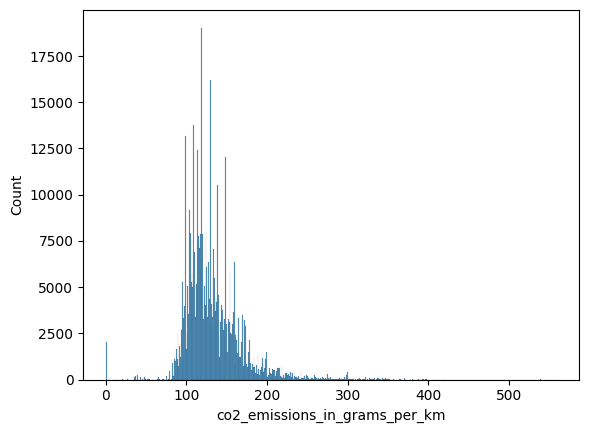

In [7]:
sns.histplot(
    data=cars,
    x='co2_emissions_in_grams_per_km',
);

In [74]:
cars.columns

Index(['country', 'pool', 'manufacturer_name_eu',
       'manufacturer_name_self_reported', 'manufacturer_name_registry',
       'type_approval_number', 'type', 'variant', 'version', 'make',
       'commercial_name', 'approved_vehicle_type_category',
       'total_new_registrations', 'co2_emissions_in_grams_per_km',
       'mass_running_order_in_kg', 'wheel_base_in_mm',
       'steering_axle_width_in_mm', 'other_axle_width_in_mm', 'raw_fuel_type',
       'fuel_mode', 'engine_capacity_in_cm3', 'engine_power_in_kilowatts',
       'electric_energy_consumption_in_watthours_per_km',
       'innovative_technology', 'co2_emissions_reduction_in_grams_per_km',
       'fuel_type'],
      dtype='object')

### Now it's your turn to explore this dataset

Which columns will you pick to visualize?

What questions do you want to answer?

Here is a snippet of code that you can use:
```python
sns.histplot(
    data=cars,
    x='<REPLACE THIS>',
    bins=30,
);
```

Create a new cell and explore the dataset.

Feel free to ask the team about specific charts you would like to draw.

## 4. Towards supervised learning

When attempting to use supervised learning to solve a problem, we need to provide three building blocks:

1. a dataset of outputs, often called the **target** variable
2. a dataset of inputs, often called **explanatory** variables
3. a family of possible relationships between input and output, often called the **model**

### Target variable

The first step is to verify that our target: CO2 emissions is available in our dataset.

Without this quantity, a row cannot be used for:
- training: there is no observation available for the model to fit
- evaluation: we cannot compare a trained model's prediction with a missing observation

In [84]:
print(f"Number of rows missing CO2 emission data: {cars.co2_emissions_in_grams_per_km.isnull().sum()}")

Number of rows missing CO2 emission data: 797


In [86]:
cars_dataset = (
    cars
    # removing all rows missing CO2 emission data
    [~cars.co2_emissions_in_grams_per_km.isnull()]
)

print(f"Number of rows missing CO2 emission data: {cars_dataset.co2_emissions_in_grams_per_km.isnull().sum()}")

Number of rows missing CO2 emission data: 0


### Explanatory variables

Now we turn to variables that we suppose may explain whether a vehicle emit more or less CO2.

It is possible to compute pair-wise correlations between columns to understand both:
- how explanatory variables may individually correlate with the target
- how expanatory variables correlate pair by pair

This approach gives a first-order overview of relationships between variables in the data.

For example, if a variable is almost uncorrelated with the target, it carries little direct explanatory power.

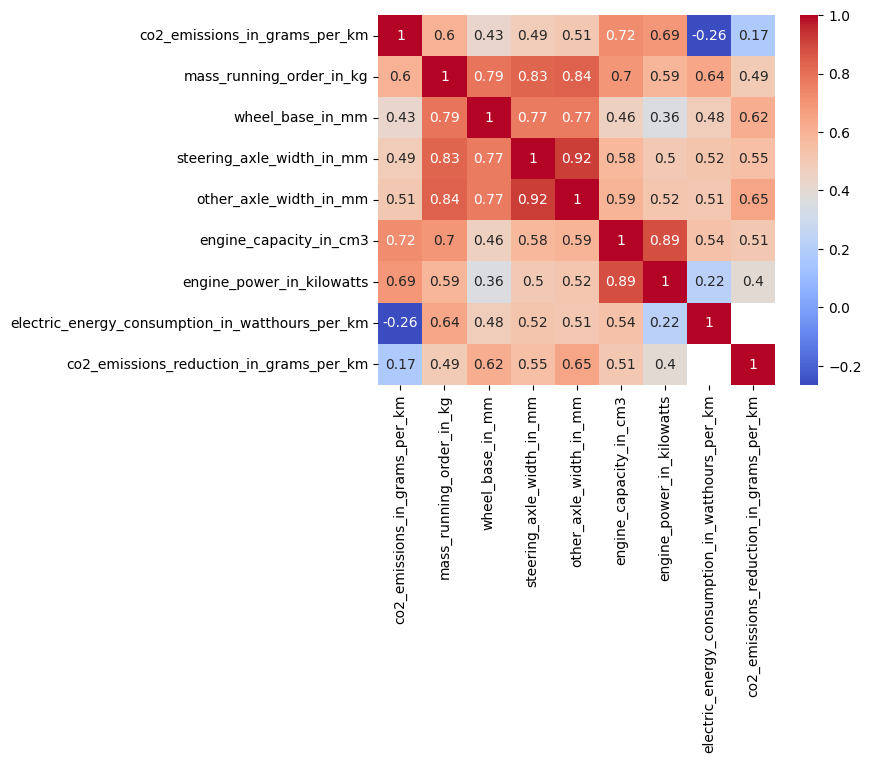

In [87]:
sns.heatmap(
    data=(
        cars
        .select_dtypes(include=['int64', 'float64'])
        .drop(axis='columns', labels='total_new_registrations')
        .corr()
    ),
    cmap='coolwarm',
    annot=True,
);

### Now it's your turn

- Decide which columns you would like to use as explanatory variables
- Group them based on their type (this is due to the machine learning library we are using today)
    1. numerical columns first
    2. categorical columns last
- Build your dataset split between:
    - `X` a table with all rows and your chosen explanatory variables as columns
    - `y` a single column containing the CO2 emissions for every row of `X``. 

In [90]:
X = (
    cars_dataset
    [[
        # numerics
        'total_new_registrations',
        'mass_running_order_in_kg',
        'wheel_base_in_mm',
        'steering_axle_width_in_mm',
        'other_axle_width_in_mm',
        'engine_capacity_in_cm3',
        'engine_power_in_kilowatts',
        'electric_energy_consumption_in_watthours_per_km',
        # categories
        'country',
        'pool',
        'fuel_mode',
        'fuel_type'
    ]]
)

y = (
    cars_dataset
    .co2_emissions_in_grams_per_km
)

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 351878 entries, 267881 to 361633
Data columns (total 12 columns):
 #   Column                                           Non-Null Count   Dtype   
---  ------                                           --------------   -----   
 0   total_new_registrations                          351878 non-null  int64   
 1   mass_running_order_in_kg                         351805 non-null  float64 
 2   wheel_base_in_mm                                 343461 non-null  float64 
 3   steering_axle_width_in_mm                        344515 non-null  float64 
 4   other_axle_width_in_mm                           332022 non-null  float64 
 5   engine_capacity_in_cm3                           350268 non-null  float64 
 6   engine_power_in_kilowatts                        291506 non-null  float64 
 7   electric_energy_consumption_in_watthours_per_km  2405 non-null    float64 
 8   country                                          351878 non-null  category
 9   pool

In [18]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 351878 entries, 267881 to 361633
Series name: co2_emissions_in_grams_per_km
Non-Null Count   Dtype  
--------------   -----  
351878 non-null  float64
dtypes: float64(1)
memory usage: 5.4 MB


## 5. Modeling

We will now attempt to pick a model, which is an adequate family of relationships.

This model needs to be trained to fit our observations relating explanatory variables to the target.

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import numpy as np


ordinal_encoder = make_column_transformer(
    (
        OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
    verbose_feature_names_out=False,
).set_output(transform='pandas')

fill_with_zero_imputer = make_column_transformer(
    (
        SimpleImputer(strategy='constant', fill_value=0),
        ['electric_energy_consumption_in_watthours_per_km'],
    )
)

most_frequent_imputer = SimpleImputer(strategy='most_frequent').set_output(transform='pandas')

standard_scaler = StandardScaler().set_output(transform='pandas')


In [21]:
from sklearn.pipeline import make_pipeline

def make_model_pipeline(machine_learning_model, with_scaling=False):
    feature_engineering_steps = [
        ordinal_encoder,
        most_frequent_imputer,
    ] + ([standard_scaler] if with_scaling else [])

    return make_pipeline(
        *feature_engineering_steps,
        machine_learning_model,
    )

In [22]:
from sklearn.linear_model import LinearRegression

linear_regression = make_model_pipeline(
    with_scaling=True,
    machine_learning_model=LinearRegression()
)
display(linear_regression)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x142c0e710>)],
                                   verbose_feature_names_out=False)),
                ('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [23]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x142c0e710>)],
                                   verbose_feature_names_out=False)),
                ('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 351878 entries, 267881 to 361633
Data columns (total 12 columns):
 #   Column                                           Non-Null Count   Dtype   
---  ------                                           --------------   -----   
 0   total_new_registrations                          351878 non-null  int64   
 1   mass_running_order_in_kg                         351805 non-null  float64 
 2   wheel_base_in_mm                                 343461 non-null  float64 
 3   steering_axle_width_in_mm                        344515 non-null  float64 
 4   other_axle_width_in_mm                           332022 non-null  float64 
 5   engine_capacity_in_cm3                           350268 non-null  float64 
 6   engine_power_in_kilowatts                        291506 non-null  float64 
 7   electric_energy_consumption_in_watthours_per_km  2405 non-null    float64 
 8   country                                          351878 non-null  category
 9   pool

In [25]:
from sklearn.ensemble import HistGradientBoostingRegressor

raw_gbm = HistGradientBoostingRegressor(
    loss='squared_error',
    categorical_features='from_dtype',
)

squared_error_gbm = make_model_pipeline(
    machine_learning_model=HistGradientBoostingRegressor(
        loss='squared_error',
        categorical_features='from_dtype',
    )
)
absolute_error_gbm = make_model_pipeline(
    machine_learning_model=HistGradientBoostingRegressor(
        loss='absolute_error',
        categorical_features='from_dtype',
    )
)

display(raw_gbm)
display(squared_error_gbm)
display(absolute_error_gbm)

HistGradientBoostingRegressor(categorical_features='from_dtype')

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x142c0e710>)],
                                   verbose_feature_names_out=False)),
                ('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features='from_dtype'))])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x142c0e710>)],
                                   verbose_feature_names_out=False)),
                ('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features='from_dtype',
                                               loss='absolute_error'))])

In [26]:
raw_gbm.fit(X_train, y_train)

HistGradientBoostingRegressor(categorical_features='from_dtype')

In [27]:
squared_error_gbm.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x142c0e710>)],
                                   verbose_feature_names_out=False)),
                ('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features='from_dtype'))])

In [28]:
absolute_error_gbm.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x142c0e710>)],
                                   verbose_feature_names_out=False)),
                ('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features='from_dtype',
                                               loss='absolute_error'))])

In [29]:
from sklearn.neural_network import MLPRegressor

multi_layer_perceptron = make_model_pipeline(
    with_scaling=True,
    machine_learning_model=MLPRegressor(
        hidden_layer_sizes=(50,50),
        learning_rate='adaptive',
        early_stopping=True,
    ),
)
multi_layer_perceptron.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x142c0e710>)],
                                   verbose_feature_names_out=False)),
                ('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(early_stopping=True, hidden_layer_sizes=(50, 50),
                              learning_rate='adaptive'))])

In [30]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    median_absolute_error,
    max_error,
)

def regression_metrics(fitted_model, X_test, y_test):
    y_pred = fitted_model.predict(X_test)

    return dict(
        mse=mean_squared_error(y_true=y_test, y_pred=y_pred),
        mae=mean_absolute_error(y_true=y_test, y_pred=y_pred),
        r2=r2_score(y_true=y_test, y_pred=y_pred),
        medae=median_absolute_error(y_true=y_test, y_pred=y_pred),
        maxe=max_error(y_true=y_test, y_pred=y_pred),
    )

(
    pd.DataFrame(
        dict(
            linear_regression=regression_metrics(linear_regression, X_test, y_test),
            raw_gbm=regression_metrics(raw_gbm, X_test, y_test),
            se_gbm=regression_metrics(squared_error_gbm, X_test, y_test),
            ae_gbm=regression_metrics(absolute_error_gbm, X_test, y_test),
            mlp=regression_metrics(multi_layer_perceptron, X_test, y_test),
        )
    )
    .T
    .assign(
        rmse=lambda x: np.sqrt(x.mse)
    )
)

,mse,mae,r2,medae,maxe,rmse
linear_regression,448.172634,13.361038,0.656665,8.898881,638.408552,21.170088
raw_gbm,92.904258,6.483669,0.928828,4.639993,230.782083,9.638686
se_gbm,102.097135,6.753576,0.921786,4.786257,204.175457,10.104313
ae_gbm,147.887898,7.106560,0.886706,4.242557,209.381715,12.160917
mlp,140.744755,7.819432,0.892179,5.512166,255.023333,11.863589


,total_new_registrations,mass_running_order_in_kg,wheel_base_in_mm,steering_axle_width_in_mm,other_axle_width_in_mm,engine_capacity_in_cm3,engine_power_in_kilowatts,electric_energy_consumption_in_watthours_per_km,country,pool,fuel_mode,fuel_type,actual_co2,predicted_co2,prediction_error,absolute_error,squared_error,number_of_nulls,number_of_numerical_nulls
vehicle_id,,,,,,,,,,,,,,,,,,,
145668,1,2195.0,NaN,NaN,NaN,2995.0,245.0,NaN,DE,VW GROUP PC,M,petrol,76.0,218.480278,-142.480278,142.480278,20300.629642,4,4
391305,3,2324.0,2984.0,1673.0,1675.0,1969.0,165.0,NaN,PL,NaN,M,petrol,49.0,190.774873,-141.774873,141.774873,20100.114665,2,1
181423,1,1050.0,2538.0,1470.0,1472.0,3750.0,NaN,NaN,ES,NaN,M,petrol,104.0,238.288860,-134.288860,134.288860,18033.498012,3,2
90125,2,2287.0,2984.0,1673.0,1675.0,1969.0,235.0,NaN,BG,NaN,M,petrol,49.0,178.187872,-129.187872,129.187872,16689.506201,2,1
135269,5,2822.0,NaN,NaN,NaN,6162.0,313.0,NaN,DE,GENERAL MOTORS,M,petrol,203.0,328.133871,-125.133871,125.133871,15658.485661,4,4


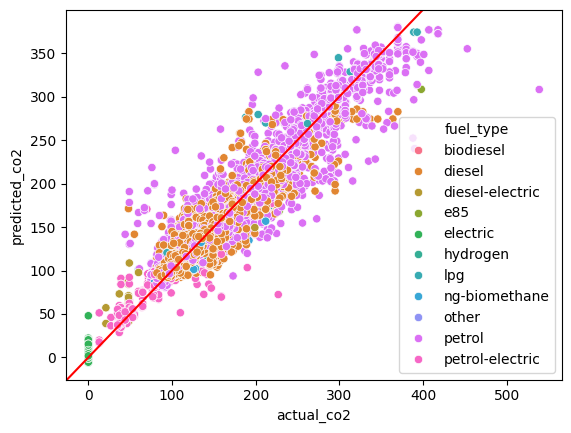

In [35]:
y_pred = raw_gbm.predict(X_test)

with_predictions = (
    X_test
    .assign(
        actual_co2=y_test,
        predicted_co2=y_pred,
        prediction_error=y_test - y_pred,
        absolute_error=np.abs(y_test - y_pred),
        squared_error=(y_test - y_pred)**2,
        number_of_nulls=lambda x: x.isnull().sum(axis='columns'),
        number_of_numerical_nulls=lambda x: x.select_dtypes(include=['float64', 'int64']).isnull().sum(axis='columns'),
    )
)

display(
    with_predictions
    .sort_values(by='prediction_error')
    .head()
)

(
    sns.scatterplot(
        data=with_predictions,
        x='actual_co2',
        y='predicted_co2',
        hue='fuel_type',
    )
    .axline((0,0), (100,100), color='red')
)

<Axes: ylabel='Frequency'>

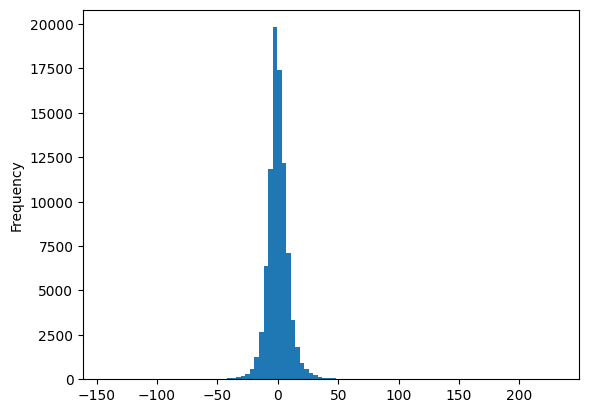

In [36]:
with_predictions.prediction_error.plot.hist(bins=100)

<Axes: xlabel='prediction_error', ylabel='fuel_type'>

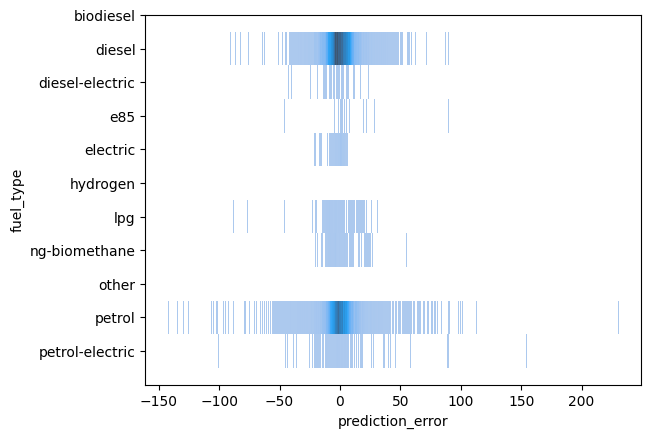

In [37]:
sns.histplot(
    data=with_predictions,
    y='fuel_type',
    x='prediction_error',
)

/Users/beaujeanpaul/Projects/intro-to-ai/.env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='number_of_numerical_nulls', ylabel='prediction_error'>

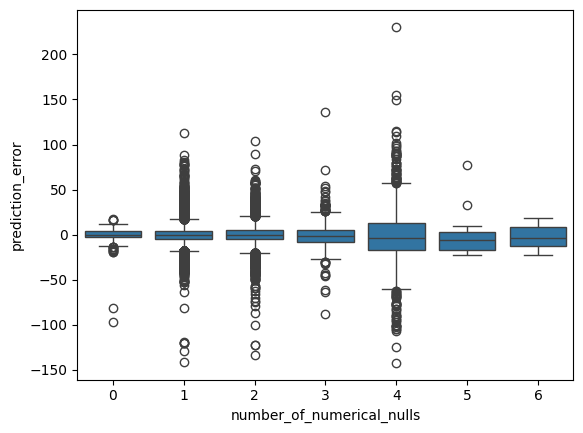

In [38]:
sns.boxplot(
    data=with_predictions,
    x='number_of_numerical_nulls',
    y='prediction_error',
)